In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

In [3]:
train.index[train.target==1]

Int64Index([    13,     29,     63,     65,     71,     72,     84,     99,
               119,    120,
            ...
            199877, 199892, 199897, 199923, 199953, 199966, 199976, 199981,
            199986, 199990],
           dtype='int64', length=20098)

In [4]:
'''
from IPython.display import display
display(train.iloc[[13],:])
tr_vc = pd.Series(train[feature_cols].values.flatten()).value_counts()
for val in train.iloc[13][feature_cols]:
    if val >= 0:
        continue
    
    print(val, tr_vc[val], tr_vc[-val])
    if tr_vc[-val] > 0 and tr_vc[val] > 0:
        res = pd.DataFrame(columns=['col', '{} cnt'.format(val), '{} cnt'.format(-val)])
        for i, col in enumerate(feature_cols):
            if val in train[col].values or -val in train[col].values:
                res.loc[i] = [col, train[col].isin([val]).sum(), train[col].isin([-val]).sum()]

        for col in ['{} cnt'.format(val), '{} cnt'.format(-val)]:
            res[col+'_cum_cnt'] = res[col].rolling(10000000, min_periods=1).sum()
            
        res[col+'_cum_cnt_diff'] = res['{} cnt'.format(-val)+'_cum_cnt']-res['{} cnt'.format(val)+'_cum_cnt']    
        display(res)
'''

"\nfrom IPython.display import display\ndisplay(train.iloc[[13],:])\ntr_vc = pd.Series(train[feature_cols].values.flatten()).value_counts()\nfor val in train.iloc[13][feature_cols]:\n    if val >= 0:\n        continue\n    \n    print(val, tr_vc[val], tr_vc[-val])\n    if tr_vc[-val] > 0 and tr_vc[val] > 0:\n        res = pd.DataFrame(columns=['col', '{} cnt'.format(val), '{} cnt'.format(-val)])\n        for i, col in enumerate(feature_cols):\n            if val in train[col].values or -val in train[col].values:\n                res.loc[i] = [col, train[col].isin([val]).sum(), train[col].isin([-val]).sum()]\n\n        for col in ['{} cnt'.format(val), '{} cnt'.format(-val)]:\n            res[col+'_cum_cnt'] = res[col].rolling(10000000, min_periods=1).sum()\n            \n        res[col+'_cum_cnt_diff'] = res['{} cnt'.format(-val)+'_cum_cnt']-res['{} cnt'.format(val)+'_cum_cnt']    \n        display(res)\n"

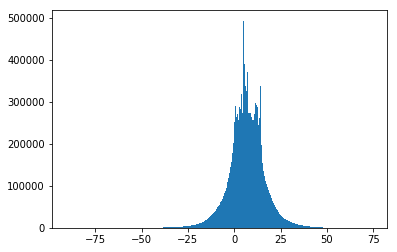

In [5]:
plt.hist(train[feature_cols].values.flatten(), bins=1000); plt.show()

In [12]:
train_num_in_round = np.round(train[feature_cols])
train_num_in_round.head(30)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,9.0,-7.0,12.0,5.0,11.0,-9.0,5.0,19.0,-5.0,6.0,3.0,3.0,14.0,1.0,9.0,15.0,6.0,-7.0,4.0,31.0,11.0,16.0,3.0,2.0,14.0,13.0,-5.0,-0.0,5.0,6.0,-0.0,13.0,-4.0,17.0,11.0,11.0,1.0,8.0,5.0,4.0,-5.0,7.0,12.0,12.0,12.0,-7.0,6.0,-14.0,16.0,5.0,13.0,29.0,-1.0,5.0,-1.0,15.0,11.0,5.0,2.0,10.0,16.0,5.0,2.0,-0.0,9.0,10.0,6.0,22.0,5.0,-5.0,22.0,1.0,5.0,9.0,43.0,18.0,-2.0,23.0,7.0,12.0,14.0,14.0,1.0,3.0,-5.0,21.0,9.0,16.0,8.0,-2.0,-21.0,7.0,11.0,10.0,15.0,0.0,9.0,16.0,2.0,-3.0,9.0,13.0,27.0,1.0,15.0,6.0,10.0,17.0,14.0,24.0,2.0,7.0,4.0,-0.0,3.0,2.0,3.0,16.0,-13.0,7.0,16.0,10.0,1.0,1.0,4.0,12.0,14.0,-1.0,-2.0,15.0,13.0,0.0,10.0,7.0,5.0,3.0,29.0,31.0,3.0,16.0,8.0,-6.0,19.0,11.0,9.0,8.0,12.0,-16.0,4.0,18.0,19.0,11.0,9.0,17.0,10.0,2.0,12.0,-13.0,18.0,12.0,15.0,5.0,4.0,5.0,7.0,13.0,3.0,-1.0,10.0,5.0,-5.0,-8.0,21.0,3.0,19.0,8.0,-10.0,14.0,-4.0,2.0,-8.0,9.0,3.0,14.0,26.0,6.0,12.0,-20.0,18.0,1.0,4.0,4.0,3.0,2.0,19.0,-2.0,8.0,9.0,13.0,-1.0
1,12.0,-4.0,14.0,5.0,12.0,7.0,6.0,17.0,3.0,8.0,-0.0,8.0,14.0,8.0,5.0,14.0,14.0,-16.0,8.0,29.0,3.0,3.0,9.0,3.0,7.0,14.0,-12.0,-3.0,5.0,1.0,-9.0,8.0,1.0,19.0,11.0,1.0,3.0,6.0,11.0,4.0,-11.0,2.0,10.0,12.0,1.0,-47.0,7.0,0.0,34.0,26.0,12.0,13.0,-4.0,7.0,-8.0,19.0,19.0,7.0,2.0,9.0,8.0,-7.0,2.0,-1.0,8.0,2.0,5.0,8.0,5.0,2.0,41.0,1.0,3.0,20.0,8.0,7.0,3.0,23.0,6.0,14.0,3.0,18.0,0.0,-5.0,-5.0,14.0,-14.0,11.0,8.0,12.0,0.0,7.0,8.0,11.0,12.0,-1.0,25.0,27.0,2.0,1.0,-14.0,8.0,35.0,2.0,15.0,3.0,7.0,32.0,14.0,13.0,7.0,7.0,5.0,9.0,4.0,4.0,3.0,8.0,-12.0,8.0,32.0,10.0,8.0,10.0,0.0,13.0,15.0,2.0,1.0,17.0,12.0,-0.0,6.0,7.0,2.0,-9.0,10.0,18.0,-2.0,16.0,4.0,7.0,-0.0,12.0,9.0,11.0,9.0,12.0,4.0,-4.0,21.0,15.0,9.0,17.0,-1.0,0.0,12.0,-10.0,22.0,11.0,29.0,6.0,4.0,16.0,-5.0,15.0,3.0,9.0,4.0,6.0,6.0,5.0,22.0,6.0,30.0,10.0,-7.0,17.0,-7.0,11.0,-6.0,9.0,-15.0,9.0,23.0,-5.0,8.0,-16.0,13.0,-0.0,8.0,8.0,3.0,11.0,15.0,2.0,8.0,9.0,18.0,2.0
2,9.0,-3.0,12.0,8.0,11.0,-9.0,7.0,15.0,-5.0,6.0,-0.0,-11.0,14.0,7.0,8.0,15.0,8.0,-2.0,5.0,20.0,18.0,18.0,1.0,4.0,6.0,13.0,-8.0,-3.0,6.0,6.0,-11.0,12.0,-2.0,19.0,11.0,4.0,5.0,7.0,11.0,1.0,-14.0,2.0,12.0,12.0,4.0,-8.0,11.0,-6.0,21.0,7.0,13.0,20.0,1.0,6.0,9.0,6.0,16.0,6.0,1.0,9.0,13.0,-10.0,1.0,6.0,4.0,-1.0,7.0,10.0,5.0,-6.0,2.0,1.0,6.0,12.0,20.0,19.0,5.0,23.0,6.0,13.0,7.0,16.0,13.0,10.0,5.0,19.0,-4.0,10.0,12.0,2.0,-22.0,7.0,14.0,11.0,14.0,0.0,20.0,17.0,2.0,-0.0,-0.0,13.0,15.0,1.0,15.0,4.0,5.0,9.0,14.0,20.0,3.0,6.0,5.0,2.0,3.0,3.0,1.0,29.0,-17.0,2.0,21.0,9.0,3.0,-2.0,4.0,12.0,14.0,-3.0,-1.0,17.0,12.0,0.0,9.0,7.0,4.0,-12.0,25.0,16.0,4.0,9.0,7.0,-2.0,10.0,7.0,9.0,4.0

In [7]:
vc = pd.Series(train_num_in_round.values.flatten()).value_counts()
len(vc), vc

(157,  6.0     2153837
  5.0     2090492
  7.0     2052862
  4.0     1799332
  14.0    1797495
  12.0    1773197
  3.0     1724935
  1.0     1707376
  11.0    1684622
  8.0     1649537
  9.0     1645678
  2.0     1619709
  13.0    1580467
  10.0    1566666
 -0.0     1448935
 -1.0     1072548
  15.0    1060905
 -2.0      864545
  16.0     797355
 -3.0      735007
  17.0     674577
 -4.0      610374
  18.0     587889
  19.0     514506
 -5.0      513871
 -6.0      444688
  20.0     443442
 -7.0      385491
  21.0     375080
 -8.0      336706
  22.0     317100
 -9.0      293125
  23.0     267303
 -10.0     255889
  24.0     224518
 -11.0     221582
 -12.0     191138
  25.0     188598
 -13.0     164492
  26.0     160137
 -14.0     140089
  27.0     136385
 -15.0     117571
  28.0     116941
  29.0     103695
 -16.0     100462
  30.0      90664
 -17.0      84349
  31.0      80773
 -18.0      72211
  32.0      70844
 -19.0      61722
  33.0      61007
  34.0      52713
 -20.0      52146
  35.

In [22]:
train_num_in_round['target'] = train['target']

In [23]:
train_num_in_round['most_cnt'] = train_num_in_round.progress_apply(lambda row: row[feature_cols].value_counts().iloc[0], axis=1)
train_num_in_round['most_cnt_product'] = train_num_in_round.progress_apply(lambda row: row[feature_cols].value_counts().index[0], axis=1)

100%|█████████████████████████████████████████████████████████████████████| 200000/200000 [06:24<00:00, 520.57it/s]


In [19]:
def plot_history(ix):
    plt.plot(train_num_in_round.iloc[ix][feature_cols].values); plt.show()
    plt.hist(train_num_in_round.iloc[ix][feature_cols].values); plt.show()

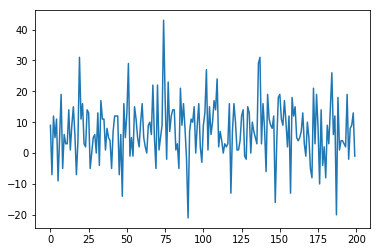

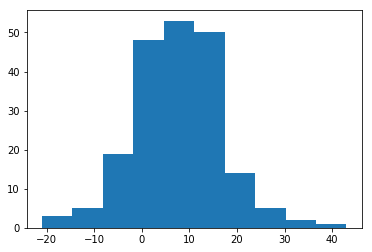

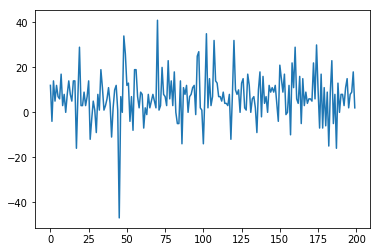

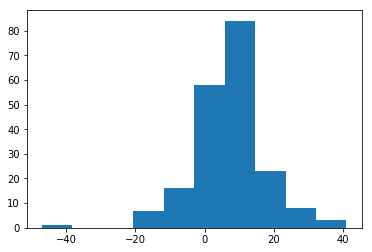

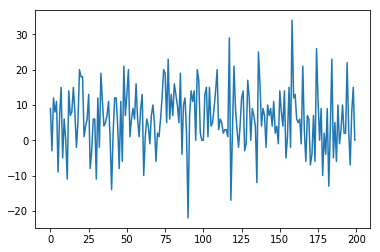

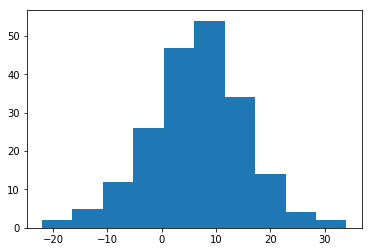

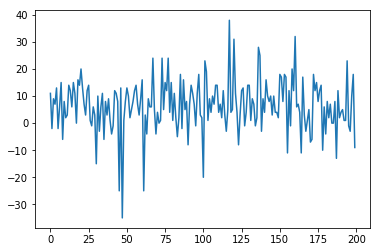

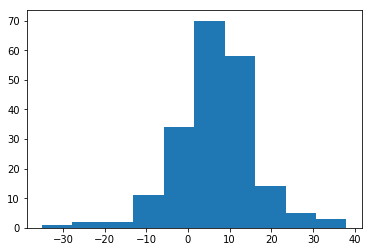

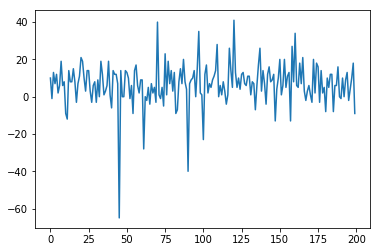

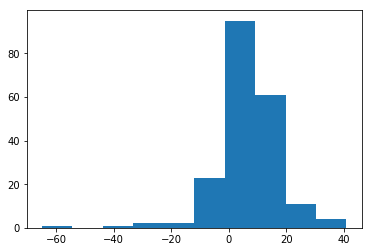

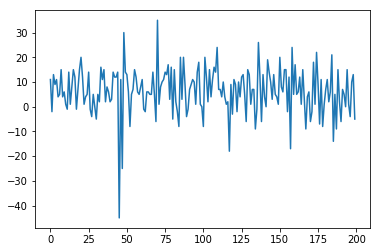

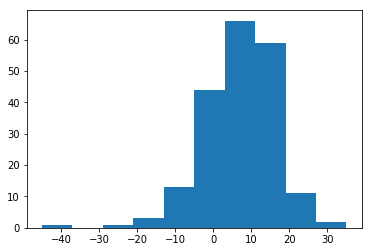

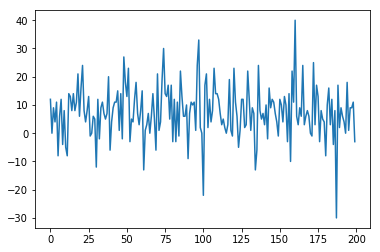

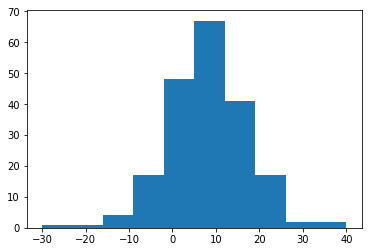

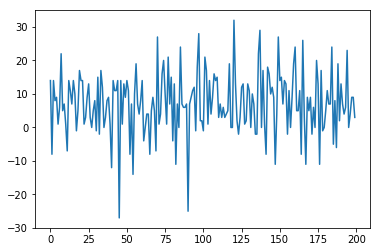

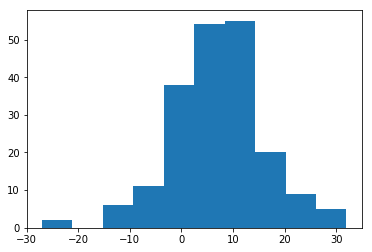

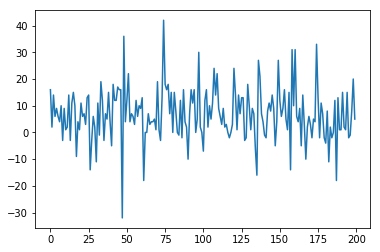

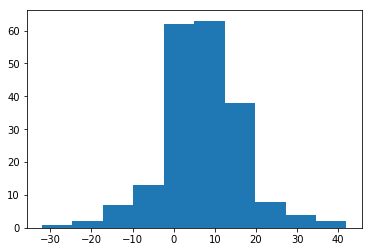

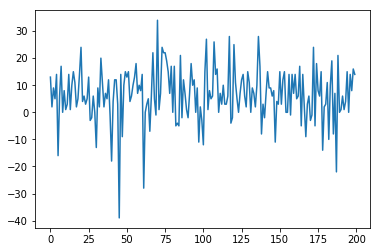

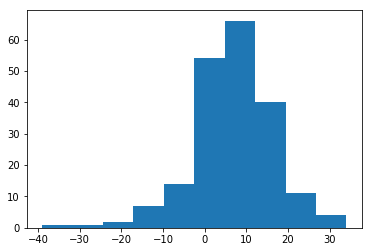

In [20]:
neg_ix = train.index[train.target==0]
for ix in neg_ix[:10]:
    plot_history(ix)

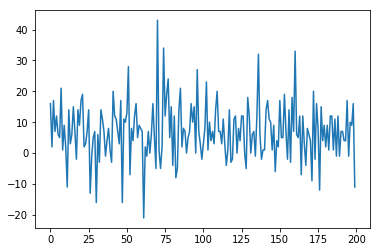

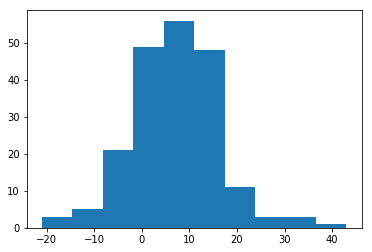

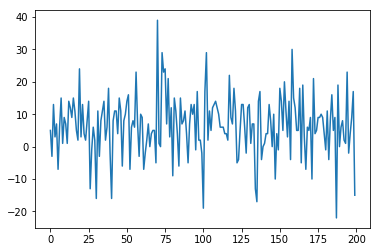

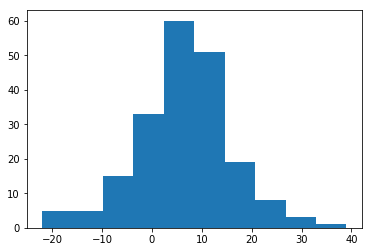

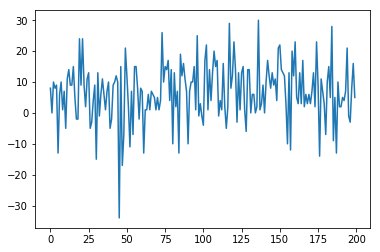

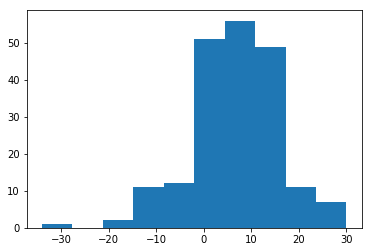

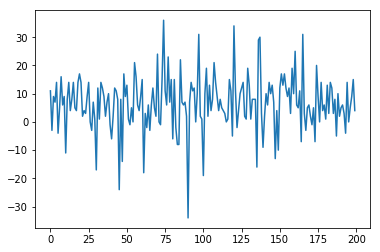

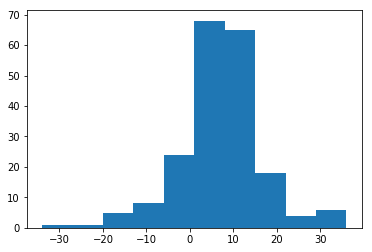

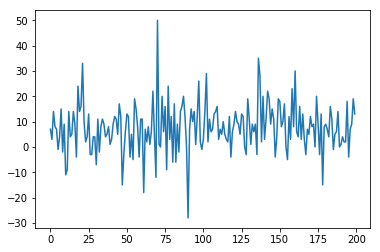

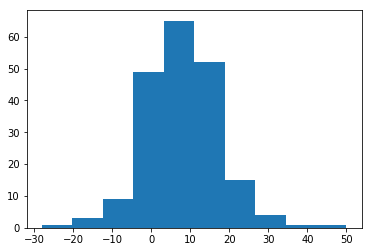

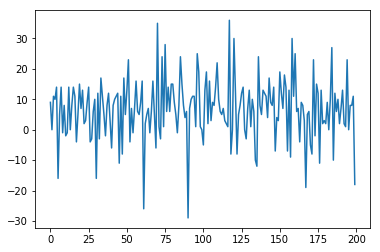

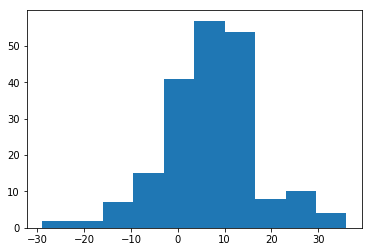

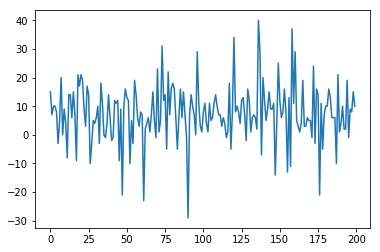

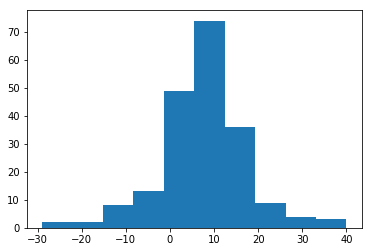

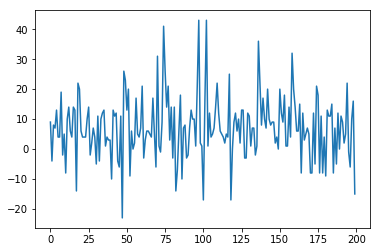

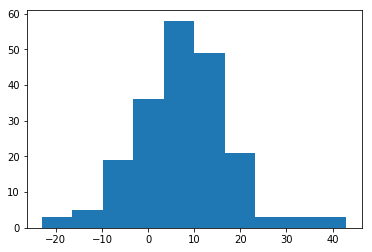

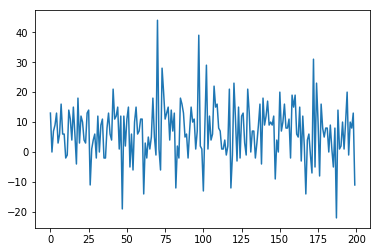

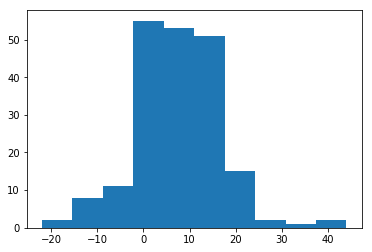

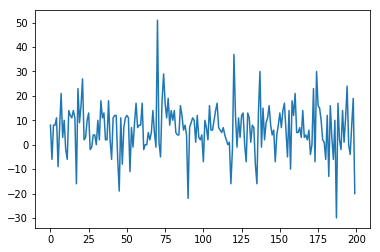

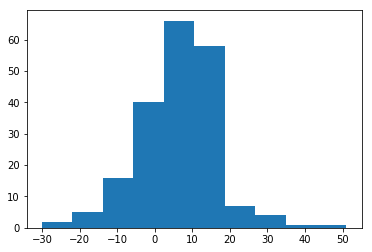

In [21]:
pos_ix = train.index[train.target==1]
for ix in pos_ix[:10]:
    plot_history(ix)

In [24]:
train_num_in_round[['target', 'most_cnt']].corr('spearman')

,target,most_cnt
target,1.000000,0.011993
most_cnt,0.011993,1.000000


In [29]:
train_num_in_round['most_cnt_product_global_cnt'] = train_num_in_round['most_cnt_product'].map(vc) - \
                                                    (-1*train_num_in_round['most_cnt_product']).map(vc).fillna(0.)
train_num_in_round['most_cnt_product_global_cnt'] = train_num_in_round['most_cnt_product_global_cnt']/train_num_in_round['most_cnt_product_global_cnt'].max()
train_num_in_round['most_cnt_ratio'] = train_num_in_round['most_cnt'] / train_num_in_round['most_cnt_product_global_cnt']

train_num_in_round[['target', 'most_cnt_product', 'most_cnt', 'most_cnt_product_global_cnt', 'most_cnt_ratio']]

,target,most_cnt_product,most_cnt,most_cnt_product_global_cnt,most_cnt_ratio
0,0,5.0,14,0.922460,15.176815
1,0,8.0,19,0.768120,24.735728
2,0,6.0,14,1.000000,14.000000
3,0,4.0,12,0.695643,17.250221
4,0,6.0,14,1.000000,14.000000
5,0,5.0,15,0.922460,16.260874
6,0,12.0,13,0.925641,14.044316
7,0,14.0,15,0.969726,15.468289
8,0,4.0,12,0.695643,17.250221
9,0,14.0,13,0.969726,13.405850


In [34]:
def get_vc(row):
    vc = row[feature_cols].value_counts()
    vc = vc[vc.index<0]
    return vc.iloc[0]
def get_vc_idx(row):
    vc = row[feature_cols].value_counts()
    vc = vc[vc.index<0]
    return vc.index[0]

train_num_in_round['most_neg_cnt'] = \
    train_num_in_round.progress_apply(get_vc, axis=1)
train_num_in_round['most_neg_cnt_product'] = \
    train_num_in_round.progress_apply(get_vc_idx, axis=1)

100%|█████████████████████████████████████████████████████████████████████| 200000/200000 [06:57<00:00, 478.78it/s]


In [37]:
train_num_in_round[['target', 'most_neg_cnt_product', 'most_neg_cnt']]

,target,most_neg_cnt_product,most_neg_cnt
0,0,-5.0,6
1,0,-5.0,4
2,0,-1.0,5
3,0,-1.0,7
4,0,-3.0,6
5,0,-1.0,6
6,0,-3.0,6
7,0,-2.0,6
8,0,-2.0,9
9,0,-2.0,5


In [36]:
train_num_in_round[['target', 'most_neg_cnt', 'most_neg_cnt_product']].corr('spearman')

,target,most_neg_cnt,most_neg_cnt_product
target,1.000000,-0.001096,0.002636
most_neg_cnt,-0.001096,1.000000,0.309577
most_neg_cnt_product,0.002636,0.309577,1.000000


In [38]:
trans_train = train[feature_cols].values.T
trans_train.shape

(200, 200000)

In [44]:
from sklearn.neighbors import NearestNeighbors
clf = NearestNeighbors()
clf.fit(trans_train)
nbrs = clf.kneighbors(trans_train, return_distance=True)
nbrs

(array([[    0.        ,  1382.24306958,  1415.79455142,  1422.4753773 ,
          1423.01300997],
        [    0.        ,  1950.40813837,  1958.66603153,  2028.55143258,
          2032.81932305],
        [    0.        ,  1209.08923947,  1243.50880824,  1248.82609168,
          1249.669278  ],
        [    0.        ,   920.01841686,   928.58433085,  1008.80619439,
          1037.24275638],
        [    0.        ,   770.87307392,   781.17687762,   793.68422974,
           800.70680233],
        [    0.        ,  3987.77824217,  4013.91475739,  4099.53929726,
          4134.82912572],
        [    0.        ,   412.08579876,   425.01935145,   433.99132318,
           525.01877348],
        [    0.        ,  1774.35890182,  1775.67281067,  1849.43472388,
          1889.52272885],
        [    0.        ,  1505.08507066,  1509.10644829,  1524.71746212,
          1566.83081276],
        [    0.        ,   614.18103123,   668.76534675,   843.00923937,
           859.35825374],
        [ 

In [49]:
dist, similar_cols = nbrs[0], nbrs[1]
print(similar_cols[0], dist[0])
train.loc[:,np.array(feature_cols)[similar_cols[0]]]

[ 0 93 42 34 43] [   0.         1382.24306958 1415.79455142 1422.4753773  1423.01300997]


,var_0,var_93,var_42,var_34,var_43
0,8.9255,9.9913,11.5767,11.1920,12.0446
1,11.5006,10.9631,9.8775,11.3702,11.7842
2,8.6093,10.5080,11.5283,11.0449,12.0406
3,11.0604,10.7795,11.7770,10.6093,11.2834
4,9.8369,10.4316,11.9171,12.4057,11.5111
5,11.4763,10.5375,11.5015,10.7209,11.6891
6,11.8091,10.4502,10.6889,11.1510,10.9480
7,13.5580,11.2303,11.2721,11.5257,11.2407
8,16.1071,10.6106,11.6615,12.2897,11.7713
9,12.5088,9.9112,11.9304,10.9237,11.9698


In [54]:
magic_cols = [col for col in feature_cols if np.median(train[col].values)<0]
train.loc[:,['target']+magic_cols]

,target,var_1,var_5,var_11,var_17,var_26,var_27,var_30,var_32,var_40,var_45,var_47,var_52,var_61,var_69,var_82,var_84,var_90,var_95,var_99,var_100,var_118,var_128,var_134,var_135,var_147,var_155,var_157,var_164,var_167,var_171,var_173,var_176,var_178,var_180,var_185,var_187,var_195,var_199
0,0,-6.7863,-9.2834,3.1821,-7.2393,-5.1488,-0.4073,-0.3085,-3.8766,-5.2387,-7.0170,-14.2136,-0.6940,4.9590,-4.7010,1.3675,-4.5213,-21.4494,0.1812,-3.4132,9.4763,-13.4221,-1.9245,5.1726,3.1345,-16.4727,1.6573,-13.1324,6.6760,-0.6975,-8.4254,3.1531,-10.1245,-3.5189,-8.4051,5.8764,-19.7159,-2.3978,-1.0914
1,0,-4.1473,7.0433,8.0585,-15.5849,-11.7684,-2.5586,-9.2987,1.2859,-11.1147,-47.3797,0.1948,-4.1083,-7.2417,2.2302,0.3683,-5.4850,0.4768,-1.2722,0.6939,-13.6950,-11.5100,0.8194,1.9568,-8.9921,11.7700,0.1898,-9.6953,-5.0121,9.3192,5.0988,5.5134,-7.2352,-7.3477,-5.5937,-4.8622,-15.9319,2.0339,1.9518
2,0,-2.7457,-9.0837,-11.2648,-1.7395,-7.9940,-2.9029,-11.1025,-2.2871,-13.5174,-7.9078,-5.7864,0.7268,-10.3734,-5.7828,13.3529,5.4604,-22.4038,0.2647,-0.0269,-0.3939,-17.2738,-0.9479,3.9358,-11.7218,1.7624,0.5778,-1.7624,-1.0410,-5.5952,-3.9116,-5.8234,-0.3104,-9.7009,-4.2935,-5.3000,-6.2660,3.1417,0.3965
3,0,-2.1518,-1.8361,2.8102,-0.4299,0.8135,-0.9059,-15.2398,-2.5731,-3.8294,-24.6840,-35.1659,1.7895,-25.0222,-3.9989,1.6212,1.6027,-7.5866,-1.0930,1.9480,-19.8592,3.5732,3.5974,-1.1984,1.9586,4.1622,-10.9370,-1.2155,-11.0882,-2.7018,-6.1920,11.7134,11.8771,-10.4701,-3.7546,-0.0498,-12.8279,-1.2706,-8.9996
4,0,-1.4834,2.4486,-12.1419,-3.0680,3.1736,-3.3423,-3.1582,-0.0083,-5.5963,-65.4863,0.0444,-1.4367,-27.7439,-3.2431,-9.2587,7.8984,-39.7997,0.0213,0.6715,-22.9264,13.8224,5.6518,-6.8304,6.4730,-12.7047,10.6101,-12.6068,6.5769,-1.7759,-2.6627,2.3705,-3.3456,1.7189,-7.6938,-7.8931,5.9270,-1.5121,-8.8104
5,0,-2.3182,3.5609,-0.6192,-1.4710,-1.2796,-4.3763,-5.0732,1.5459,2.6553,-44.7257,-24.6935,-7.7762,-0.7472,-5.6684,1.8135,-8.3058,-1.1717,1.1735,0.0886,-8.3794,8.6835,-5.8702,-8.8256,-0.9844,4.7280,-2.0738,-16.8151,1.3847,-9.0953,-2.0285,1.4457,-6.5247,-7.6283,7.1968,-13.6509,-8.9114,1.0314,-4.7602
6,0,-0.0832,-8.0198,-7.5271,11.0922,-0.5156,0.0690,-12.3890,-1.5290,4.4616,1.0776,-2.0894,-3.4444,-12.6687,-5.7921,-2.5448,-1.3374,-9.2271,0.6137,0.0483,-22.2159,1.3141,2.7085,-13.2871,-5.7890,6.8520,-2.5725,-10.0345,6.1213,5.9109,-1.1405,2.6965,-3.0403,4.5637,-8.1416,-4.2870,-29.9763,0.5845,-3.2097
7,0,-7.9881,0.8310,-6.7033,-0.7226,3.3883,-0.4418,-0.9976,-2.0712,-12.0219,-27.2543,0.8217,-8.4732,-3.7978,-7.4110,-10.5909,-0.3443,-24.7167,-0.6602,2.2442,-0.6013,0.2901,1.7439,-1.8253,-1.9968,-10.6657,-1.5242,-0.0072,-8.2583,-10.9163,-2.3522,0.0876,-11.1786,-0.6535,5.1140,-4.8220,-5.9076,-0.3776,3.4806
8,0,2.4426,6.1630,1.7982,-8.9472,-14.4918,-2.5407,-11.1344,-1.0573,-5.1399,16.4608,-31.7855,4.1448,-18.0895,1.4661,7.7530,-0.5715,-9.9819,0.3753,-0.4049,-6.6310,0.2490,-2.3019,-6.2121,-16.4566,-5.2689,1.1374,-14.2764,-5.2618,-9.5251,-1.7865,3.5803,-2.4845,7.4609,-3.9172,-0.0030,-18.3172,-1.9940,4.8453
9,0,1.9743,-16.2859,3.0537,1.5367,-3.2200,-2.3302,-13.1141,2.2580,-17.9593,-39.3042,-9.1752,4.0230,-27.7693,-1.4481,-4.6693,-5.2838,-1.7442,-0.3913,-3.1096,-12.3881,-4.4909,2.0829,1.8246,10.1502,-10.5564,0.1317,-1.3546,-5.3527,-9.1925,-1.2558,-4.5382,6.3377,-13.8960,2.7878,-7.6785,-21.6070,0.4467,14.2514


In [55]:
train['positive_cnt_in_magic_cols'] = train[magic_cols].progress_apply(lambda row: (row.values>0).sum(), axis=1)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:03<00:00, 50742.10it/s]


In [59]:
train['positive_mean_in_magic_cols'] = train[magic_cols].progress_apply(lambda row: row.values[(row.values>0)].mean(), axis=1)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:04<00:00, 44543.43it/s]


In [62]:
train['positive_sum_in_magic_cols'] = train[magic_cols].progress_apply(lambda row: row.values[(row.values>0)].sum(), axis=1)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:03<00:00, 59719.32it/s]


In [67]:
train.loc[:,['target','positive_cnt_in_magic_cols', 'positive_mean_in_magic_cols', 'positive_sum_in_magic_cols']]

,target,positive_cnt_in_magic_cols,positive_mean_in_magic_cols,positive_sum_in_magic_cols
0,0,11,4.076000,44.8360
1,0,17,3.470871,59.0048
2,0,9,3.291000,29.6190
3,0,12,3.955583,47.4670
4,0,14,4.814886,67.4084
5,0,12,2.942317,35.3078
6,0,14,3.436707,48.1139
7,0,9,2.000156,18.0014
8,0,13,4.452054,57.8767
9,0,13,3.912208,50.8587


In [63]:
train.loc[:,['target','positive_cnt_in_magic_cols', 'positive_mean_in_magic_cols', 'positive_sum_in_magic_cols']].corr('spearman')

,target,positive_cnt_in_magic_cols,positive_mean_in_magic_cols,positive_sum_in_magic_cols
target,1.000000,0.109009,0.071852,0.122279
positive_cnt_in_magic_cols,0.109009,1.000000,0.037763,0.650773
positive_mean_in_magic_cols,0.071852,0.037763,1.000000,0.749051
positive_sum_in_magic_cols,0.122279,0.650773,0.749051,1.000000


In [68]:
test['positive_sum_in_magic_cols'] = test[magic_cols].progress_apply(lambda row: row.values[(row.values>0)].sum(), axis=1)

100%|███████████████████████████████████████████████████████████████████| 200000/200000 [00:03<00:00, 60578.53it/s]


In [69]:
train[['positive_sum_in_magic_cols']].to_pickle('features/positive_sum_in_magic_cols_train')
test[['positive_sum_in_magic_cols']].to_pickle('features/positive_sum_in_magic_cols_test')